# Course Title: Data Analytics & Statistics in Python
## Metropolia University of Applied Sciences
## Week 5: Relationship between variables
### Date: 2.4.2025

<table "<table style="width: 100%;">
  <tr>
    <td style="text-align: left; vertical-align: middle;">
      <ul style="list-style: none; padding-left: 0;">
        <li><strong>Instructor</strong>: Hamed Ahmadinia, Ph.D</li>
        <li><strong>Email</strong>: hamed.ahmadinia@metropolia.fi
        <li><strong>Web</strong>: www.ahmadinia.fi</li>          </li>
      </ul>
    </td>
  </tr>
</table>

**© 2025 Hamed Ahmadinia – [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/)**

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

import math  # Provides access to mathematical functions like sqrt(), log(), and constants like pi

import pandas as pd  # For loading, manipulating, and analyzing structured data (DataFrames)
import numpy as np  # For numerical operations and handling arrays

import matplotlib.pyplot as plt  # For basic static plots (line, bar, scatter, etc.)
import seaborn as sns  # For advanced statistical data visualizations with built-in themes

# Hypothesis testing and statistical functions from SciPy
from scipy.stats import (
    shapiro,        # Test for normality (Shapiro-Wilk)
    mannwhitneyu,   # Non-parametric test for two independent samples
    ttest_ind,      # Independent two-sample t-test
    zscore          # Standardize (z-score) a dataset
)

# Linear regression model and data splitting tools from scikit-learn
from sklearn.linear_model import LinearRegression  # For building linear regression models
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets

# Regression model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance (error, goodness of fit)

## 📌 Understanding Variance, Covariance, and Correlation

In Week 5, we explore how variables relate to each other using three core statistical concepts:

---

### 1. **Variance (📐 Measuring Spread)**  
Variance tells us **how spread out** the values of a single variable are. It is the average of the squared differences from the mean.  
- **High variance** → more spread  
- **Low variance** → values are close to the mean  
Used to understand the **internal variability** of a variable.

📦 Example (High School Level):  
Imagine a classroom where students take a 10-question quiz.  
- In Class A, most students score between 8 and 10 → **Low variance**  
- In Class B, scores range from 2 to 10 → **High variance**

📦 Data Example: Daily forum page views with large ups and downs will have high variance.

---

### 2. **Covariance (🔗 Measuring Direction of Relationship)**  
Covariance indicates whether two variables **move together**:
- **Positive covariance** → variables increase together  
- **Negative covariance** → one increases while the other decreases  
However, **magnitude is hard to interpret** due to dependency on scale.

📦 Example (High School Level):  
You track the hours you study and your test scores:
- If more study hours = higher scores → **positive covariance**
- If more phone time = lower scores → **negative covariance**

📦 Data Example: Daily page views and their rolling 30-day average might move together with strong positive covariance.

---

### 3. **Correlation (📈 Measuring Strength & Direction)**  
Correlation is the **normalized** form of covariance. It measures both:
- **Direction** (positive/negative)  
- **Strength** (scale between -1 to +1)

Three common correlation methods:
- **Pearson r**: Linear relationship (parametric)
- **Spearman ρ**: Monotonic relationship (non-parametric)
- **Kendall τ**: Rank-based relationship (non-parametric)

📦 Example (High School Level):  
Let’s say you compare student height and weight. As height increases, weight also tends to increase → **strong positive correlation**.  
If you compare shoe size and math grades, the correlation is likely **very weak or zero**.

| Method    | Type of Data         | Handles Non-Linearity | Sensitive to Outliers |
|-----------|----------------------|------------------------|------------------------|
| Pearson   | Continuous           | ❌ No                 | ✅ Yes                |
| Spearman  | Ordinal/Continuous   | ✅ Yes               | 🚫 No                 |
| Kendall   | Ordinal/Continuous   | ✅ Yes               | 🚫 No                 |

---

## 🎯 When to Use What?

| You want to...                                  | Use                |
|--------------------------------------------------|---------------------|
| Measure variation of a single variable           | Variance            |
| Check if two variables move together             | Covariance          |
| Measure strength of relationship (normalized)    | Correlation         |
| Assess linear relationship with continuous data  | Pearson correlation |
| Check monotonic or non-linear trend              | Spearman/Kendall    |

---

## 📊 Visualizing Relationships

- Use **scatter plots** for visualizing covariance or correlation.
- Use **heatmaps** for correlation matrices.
- Always pair visuals with numeric values to confirm assumptions.

---

> ✅ **Tip**: Correlation does **not** imply causation.  
> Just because two things move together doesn’t mean one causes the other!  
> Example: Ice cream sales and drowning incidents may both increase in summer—but one doesn't cause the other.

## 📌 1. Loading the Dataset  
In this week, we load the **FCC Forum Page Views** dataset from a public GitHub repository.  
This dataset tracks daily page views on the freeCodeCamp forum from 2016 to 2019. It includes a timestamp (`date`) and the corresponding number of page views (`value`).

- Date (timestamp)
- Page Views (numeric count of forum visits)

---

**🎯 Why we do it:**  
We use real-world time-series data to demonstrate statistical techniques such as covariance, correlation analysis, and linear regression. This dataset is ideal for exploring how trends evolve over time and how statistical relationships can be quantified and predicted.

**🛠️ Key Action:**  
Use `pandas.read_csv()` to load the dataset, convert the `date` column to datetime, and inspect the first few rows to ensure the data is ready for analysis.
ctly.


In [2]:
# Load dataset from GitHub URL
df = pd.read_csv("https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/fcc-forum-pageviews.csv")

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Dataset summary
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

# Convert 'date' column to datetime format and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

Dataset Preview:
         date  value
0  2016-05-09   1201
1  2016-05-10   2329
2  2016-05-11   1716
3  2016-05-12  10539
4  2016-05-13   6933

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB

Summary Statistics:
              value
count  1.304000e+03
mean   6.722068e+04
std    5.933964e+04
min    1.201000e+03
25%    3.575775e+04
50%    5.719750e+04
75%    8.388300e+04
max    1.173655e+06


## 🧼 2. Handling Missing Data

In [3]:
## Handling Missing Data
missing_counts = df.isnull().sum()
print("Missing Data Count:\n", missing_counts)

Missing Data Count:
 value    0
dtype: int64


## 🧪 3. Check Data Distribution using Shapiro-Wilk test

In [4]:
# Check Data Distribution Using Shapiro-Wilk Test

def check_distribution(df):
    distribution_results = {}  # Dictionary to store results for each numeric column

    # Loop through all numeric columns in the DataFrame
    for column in df.select_dtypes(include=['number']).columns:
        try:
            # Apply the Shapiro-Wilk test to a random sample of 100 non-null values
            stat, p = shapiro(df[column].dropna().sample(n=100, random_state=42))

            # Interpret the p-value to determine normality
            distribution_results[column] = "Normal Distribution" if p > 0.05 else "Skewed Distribution"
        except:
            # In case the test fails (e.g., not enough data), store a failure message
            distribution_results[column] = "Test Failed"

    return distribution_results  # Return the dictionary with results

# Call the function and store the results
distribution_results = check_distribution(df)

# Print the normality check results
print("Data Distribution Check:\n", distribution_results)

Data Distribution Check:
 {'value': 'Skewed Distribution'}


## 📊 4. Detect, Report, and Visualize Outliers Using Z-Score

Number of outliers detected per column:
 value    7
dtype: int64

--- Summary Statistics ---


,count,mean,std,min,25%,50%,75%,max
value,1304.0,67220.683282,59339.639956,1201.0,35757.75,57197.5,83883.0,1173655.0



 Boxplots to Inspect Outliers:


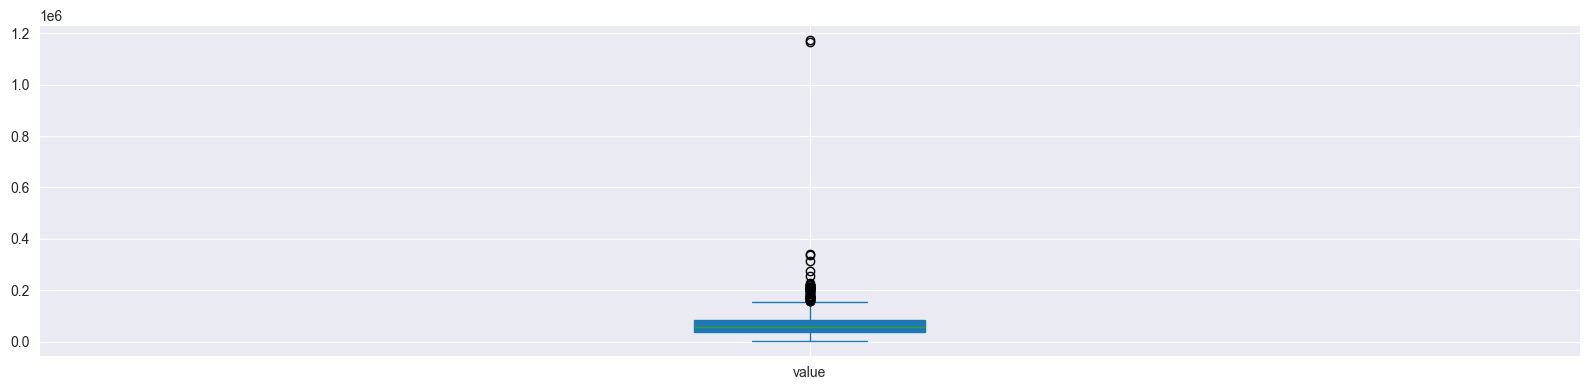

In [5]:
# Detect, Report, and Visualize Outliers Using Z-Score

def visualize_outliers(df, threshold=3):
    df_numeric = df.select_dtypes(include=['number'])

    # Calculate Z-scores
    z_scores = df_numeric.apply(zscore, nan_policy='omit')

    # Count how many values are considered outliers
    outlier_counts = (z_scores.abs() > threshold).sum()
    print("Number of outliers detected per column:\n", outlier_counts)

    # Summary statistics
    print("\n--- Summary Statistics ---")
    display(df_numeric.describe().T)

    # Boxplot visualization
    print("\n Boxplots to Inspect Outliers:")
    df_numeric.plot(kind='box', subplots=True, layout=(1, len(df_numeric.columns)), figsize=(16, 4), patch_artist=True)
    plt.tight_layout()
    plt.show()

# Apply outlier visualization
visualize_outliers(df)

## 🔗 4. Exploring Covariance Between Variables


Covariance Matrix:
                     value  rolling_mean
value         3.528044e+09  1.320357e+09
rolling_mean  1.320357e+09  1.309382e+09


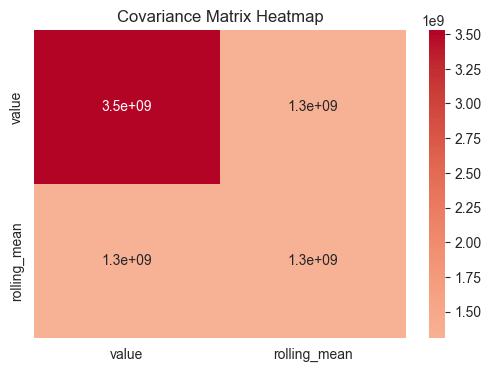

In [6]:
# Covariance Analysis

# Calculate a 30-day rolling mean to smooth out short-term fluctuations
df['rolling_mean'] = df['value'].rolling(window=30).mean()

# Remove rows with NaN values introduced by the rolling window
df_clean = df.dropna()

# Calculate the covariance matrix between the original values and their rolling mean
cov_matrix = df_clean[['value', 'rolling_mean']].cov()

# Display the covariance matrix
print("\nCovariance Matrix:")
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", center=0)

# Add plot title
plt.title("Covariance Matrix Heatmap")

# Show the plot
plt.show()

The covariance matrix shows how much two variables change together:

- The **diagonal values** (`3.53e+09` and `1.31e+09`) represent the **variance** of `value` and `rolling_mean` respectively. These are large because page view counts vary widely over time.
- The **off-diagonal values** (`1.32e+09`) represent the **covariance between `value` and `rolling_mean`**.
  - Since this value is large and **positive**, it indicates a strong **positive linear relationship** between daily page views and their 30-day rolling average.

**Conclusion**: As page views increase or decrease, the rolling average tends to follow in the same direction—confirming that they move together.

## 📈 5. Analyzing Correlation Between Variables


Pearson Correlation:
                 value  rolling_mean
value         1.000000      0.614315
rolling_mean  0.614315      1.000000

Spearman Correlation:
                 value  rolling_mean
value         1.000000      0.904728
rolling_mean  0.904728      1.000000

Kendall Correlation:
                 value  rolling_mean
value         1.000000      0.733107
rolling_mean  0.733107      1.000000


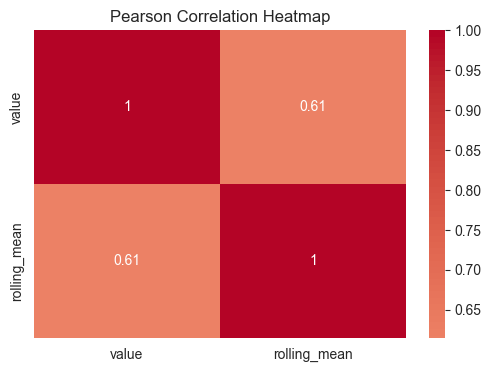

In [7]:
# Calculate correlation matrices using different methods:

pearson_corr = df_clean.corr(method='pearson') # - Pearson: linear correlation (assumes normality)
spearman_corr = df_clean.corr(method='spearman') # - Spearman: rank-based correlation (monotonic relationships)
kendall_corr = df_clean.corr(method='kendall') # - Kendall: rank correlation (more robust with small samples or ties)

# Display the correlation matrices
print("\nPearson Correlation:")
print(pearson_corr)

print("\nSpearman Correlation:")
print(spearman_corr)

print("\nKendall Correlation:")
print(kendall_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", center=0)

# Add title
plt.title("Pearson Correlation Heatmap")

# Show plot
plt.show()

We examined the relationship between daily page views (`value`) and their 30-day rolling average (`rolling_mean`) using three correlation methods:

- ** Pearson (r = 0.61)** → Moderate linear relationship  
- ** Spearman (ρ = 0.90)** → Strong monotonic relationship  
- ** Kendall (τ = 0.73)** → Strong positive association

---

All three methods confirm that the two variables move together in the same direction:
- Pearson detects linear trends,
- Spearman and Kendall show strong rank-based correlation—even if the relationship isn’t perfectly linear.

## 📌 Linear Regression, Multivariate Modeling, and Model Evaluation

Linear regression is a foundational statistical technique for understanding and predicting relationships between variables. In Week 5, we focus on:

---

### 1. **Simple Linear Regression (📐 One Feature)**  
We model the relationship between one independent variable (**X**) and a dependent variable (**y**) using the equation:

\[
y = b_0 + b_1x
\]

- **b₀**: Intercept  
- **b₁**: Slope (coefficient for x)

Used when there's one predictor and a linear relationship is assumed.

📘 **Real-life Example:**  
Imagine you're tracking your study time and exam scores.

| Hours Studied (X) | Exam Score (Y) |
|-------------------|----------------|
| 1                 | 50             |
| 2                 | 60             |
| 3                 | 70             |
| 4                 | 80             |

A simple regression line could look like:  
\[
\text{Score} = 40 + 10 \times \text{Hours Studied}
\]

This means:  
- If you study 0 hours, you'd get ~40 points  
- Every extra hour adds 10 points to your score

---

### 2. **Multivariate Linear Regression (📊 Multiple Features)**  
When multiple features are involved, we extend the model:

\[
y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n
\]

📘 **Example:**  
Predicting your final grade based on:
- **Hours studied**  
- **Number of practice quizzes completed**  
- **Sleep hours before exam**

This helps model **real-world outcomes** using more than one factor.

✅ **Tip**: Always scale or normalize features if units vary significantly.

---

### 3. **Loss Function & Minimization (📉 Mean Squared Error)**  
To train a regression model, we minimize the **Mean Squared Error (MSE)**:

\[
MSE = \\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2
\]

- Measures how far predictions are from actual results  
- The goal is to **adjust the line** so it fits the points as closely as possible

📌 Known as **Ordinary Least Squares (OLS)**.

---

### 4. **Evaluating Regression Models (🔍 How Good is Your Fit?)**

| Metric                | Description                                                | Ideal Value  |
|-----------------------|------------------------------------------------------------|--------------|
| 🔢 **R² Score**        | Proportion of variance in y explained by X                | Close to 1   |
| 🧮 **MSE / RMSE**      | Average of squared errors / Root of MSE                    | As low as possible |
| 📉 **Residual Analysis** | Plot of actual - predicted values; check for randomness | Random scatter |
| 🧭 **Intercept & Coefficients** | Explain model behavior and direction             | Context-based |

---

## 🎯 Best Practices for Regression Modeling

✅ **Visualize your data first** – check for linearity  
✅ **Split data** into train/test to prevent overfitting  
✅ **Check residuals** for patterns  
✅ **Don't extrapolate too far beyond training data**

---

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/800px-Linear_regression.svg.png" alt="Linear Regression" width="600"/>

> ✅ **Comment**: Linear regression is simple, yet powerful. Its interpretability and speed make it a strong baseline model before trying more complex approaches like decision trees or neural networks.

## 📐 6. Predicting with Linear Regression using Scikit-Learn

In [8]:
# Linear Regression with Scikit-Learn

# Goal: Predict the actual value based on its rolling mean

# Define features (independent variable) and target (dependent variable)
X = df_clean[['rolling_mean']]  # Feature: smoothed version of the value
y = df_clean['value']           # Target: original value

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values for the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("\nModel Evaluation:")
print("Intercept:", model.intercept_)         # The constant term (β₀)
print("Coefficient:", model.coef_[0])         # The slope (β₁) for rolling_mean
print("R-squared:", r2_score(y_test, y_pred)) # Proportion of variance explained
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # Average squared error


Model Evaluation:
Intercept: 2711.865351573957
Coefficient: 0.9764238516951106
R-squared: 0.24420814471315389
Mean Squared Error: 4718661966.647624


We used linear regression to predict daily page views based on the 30-day rolling average.

### Model Summary:
- **Intercept**: 2711.87  
- **Coefficient**: 0.976  
- **R² Score**: 0.24  
- **Mean Squared Error**: ~4.72 billion

---

- The coefficient close to **1** suggests a nearly 1-to-1 relationship between rolling average and actual page views.
- However, **R² = 0.24** indicates the model explains only **24% of the variance** — the relationship exists but isn't very strong.
- The relatively large MSE reflects the high variability in daily page views.

> **Conclusion**: Rolling averages are helpful predictors, but not enough alone for highly accurate forecasts.

## 🖼️ 6.1 Visualizing the Regression Line

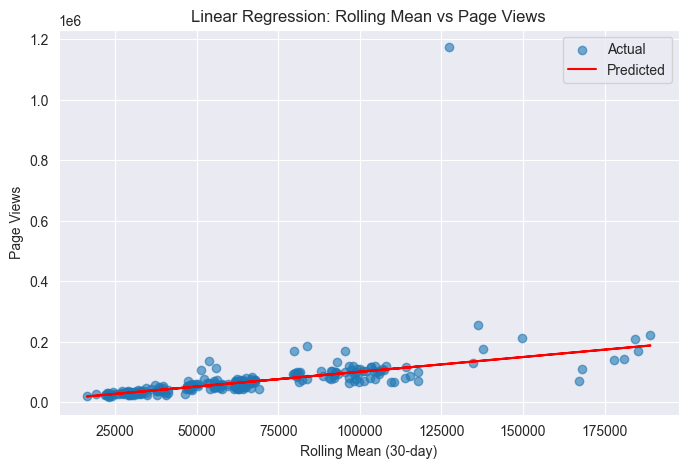

In [9]:
# Visualize Regression Results

plt.figure(figsize=(8, 5))  # Set the figure size

# Scatter plot of actual test data
plt.scatter(X_test, y_test, label='Actual', alpha=0.6)

# Plot regression line (predicted values)
plt.plot(X_test, y_pred, color='red', label='Predicted')

# Add labels and title
plt.xlabel("Rolling Mean (30-day)")
plt.ylabel("Page Views")
plt.title("Linear Regression: Rolling Mean vs Page Views")

# Add legend and show the plot
plt.legend()
plt.show()

The scatter plot shows the relationship between the 30-day rolling average (`x-axis`) and actual page views (`y-axis`). The blue dots represent actual observations, while the red line shows the predictions from our linear regression model.

- Most data points cluster around the lower end of the x-axis, with a few high outliers.
- The red line fits **below many of the actual values**, indicating underprediction in some regions.
- The **spread around the line is quite large**, reflecting the relatively low R² score (0.24).

**Conclusion**: The model captures a general upward trend, but due to noise and outliers, predictions are not highly precise.

## 📊 6.2 Plotting Residuals to Evaluate Model Error

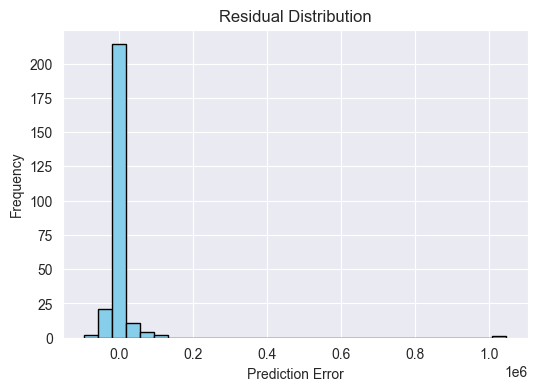

In [10]:
# Residual Plot: Check Prediction Errors

# Calculate residuals (actual - predicted)
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')

# Add plot title and axis labels
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")

# Show the plot
plt.show()


The residual plot shows the **distribution of prediction errors** (difference between actual and predicted page views).ns:
- Most residuals are **clustered tightly around 0**, which is a good sign — the model is often close to actual values.
- However, there are **a few extreme outliers** with large errors, likely due to unpredictable spikes in traffic.
- The distribution is **positively skewed**, indicating the model occasionally **underpredicts** very high page vws.

✅ **Conclusion**: While the model performs reasonably well for typical values, it struggles with extreme fluctuations — common in real-world web trafic data.
